<a href="https://colab.research.google.com/github/juandiegolunaa/HWCriptography/blob/main/HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW Cryptography

#### Name: María Emilia Aguirre & Juan Diego Luna
#### Assignment Date: October 17, 2024
#### NRC: 1444

### Responses or answers to the questions

## Question 1

### PicoCTF Assignments

### interencdec Challenge

#### First Approach

The provided string, "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgya3lNRFJvYTJvMmZRPT0nCg==", appears to be Base64-encoded, indicated by the two equal signs at the end, which often signify padding in Base64 encoding.

To decode the string, we used an online Base64 decoder, which revealed the following result:



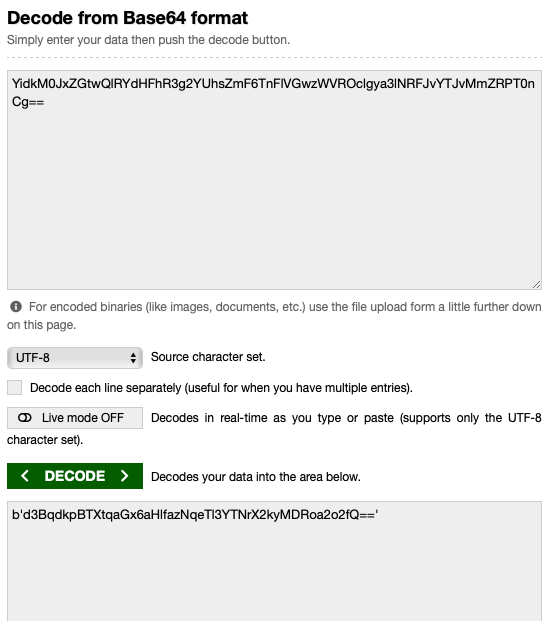

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Desktop/Screen Shot 2024-10-15 at 16.10.06.png', width=400)



Next, we removed the letter "b" from the string, decoded it again, and obtained the following result:

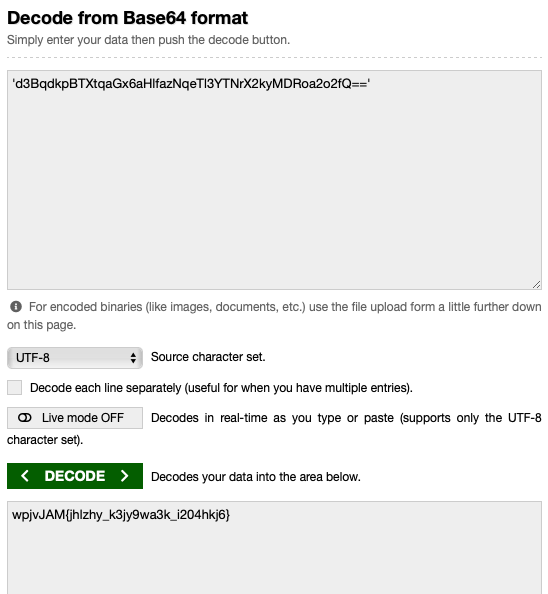

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Desktop/Screen Shot 2024-10-15 at 16.26.20.png',width=400)

Subsequently, we used a Caesar cipher decoder to retrieve the flag, as shown below:

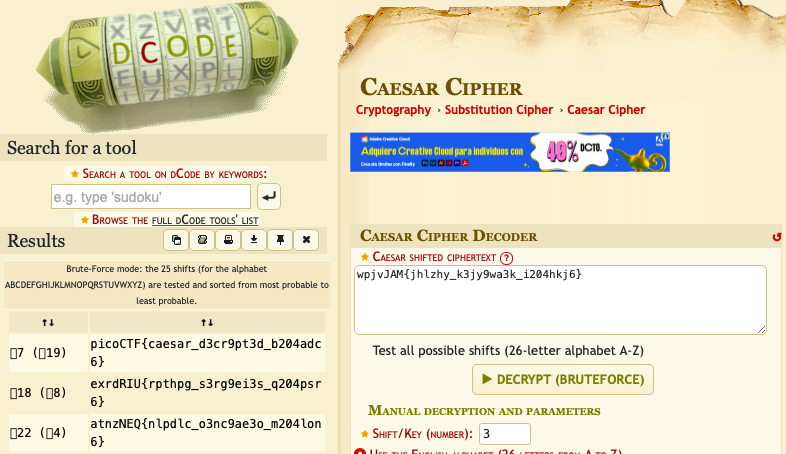

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Desktop/Screen Shot 2024-10-15 at 16.32.49.png',width=400)

Finally, the correct flag is: picoCTF{caesar_d3cr9pt3d_b204adc6}

#### Second Approach

In [ ]:
import base64

# Base64 String
base64_string = "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgyeG9OakJzTURCcGZRPT0nCg=="

# Decode
decoded_bytes = base64.b64decode(base64_string)

# Convert to String
decoded_string = decoded_bytes.decode('utf-8')

print(decoded_string)



b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2xoNjBsMDBpfQ=='



We have to decode again the d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2xoNjBsMDBpfQ==

Then we have to apply the cipher text in a page as we did before

In [ ]:

# Base64 String Again
base64_string = "d3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2xoNjBsMDBpfQ=='"

# Decode
decoded_bytes2 = base64.b64decode(base64_string)

# Convert to String
decoded_string2 = decoded_bytes2.decode('utf-8')

print(decoded_string2)

wpjvJAM{jhlzhy_k3jy9wa3k_lh60l00i}


Finally, the correct flag is: picoCTF{caesar_d3cr9pt3d_ea60e00b}

### The Numbers Challenge

#### First Approach

Provided below is the following image:

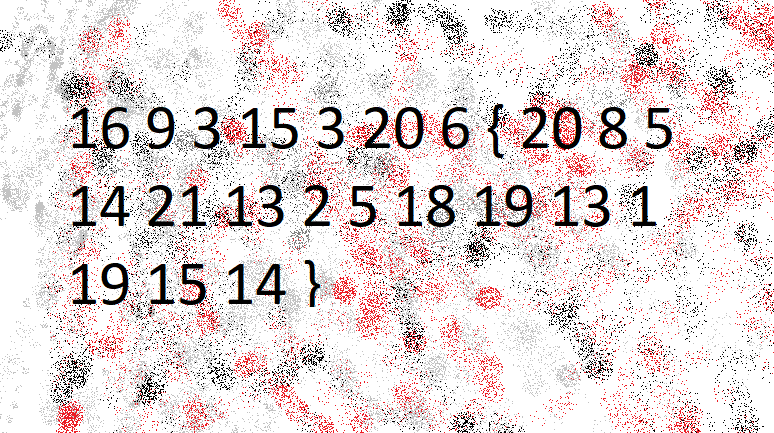

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Downloads/the_numbers.png',width=400)

To decode this flag, I used the same online platform, but this time with the A1Z26 (Number to Letter) configuration.
As a result, the flag is:

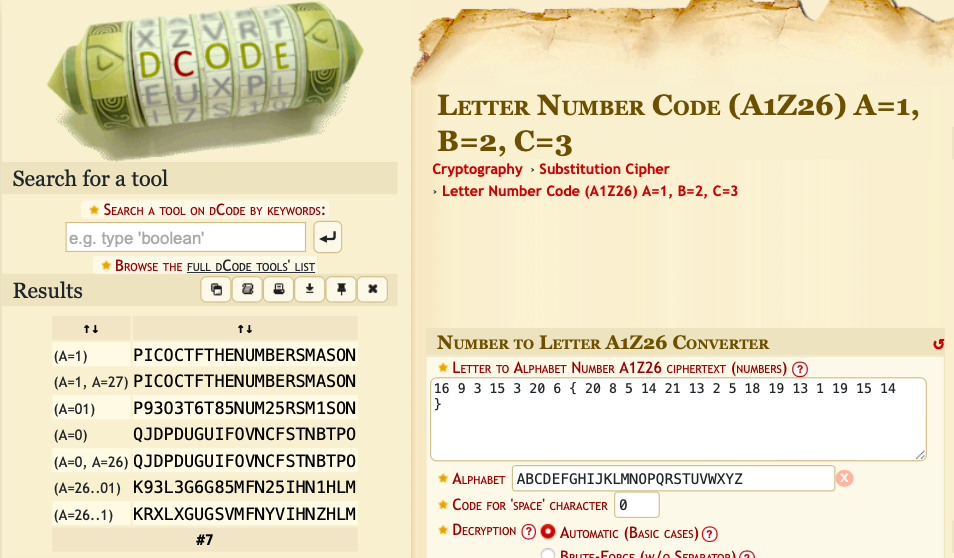

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Desktop/Screen Shot 2024-10-15 at 17.12.46.png',width=400)

#### Second Approach

This code provides a solution to decode a series of numbers into letters using the A1Z26 cipher (where A=1, B=2, ..., Z=26). It converts numbers to their corresponding uppercase letters and prints the decoded strings for two number sequences.

In [ ]:
def numeros_a_letras(numeros):
    letras = ""
    for numero in numeros:
        numero = int(numero)
        if 1 <= numero <= 26:
            letras += chr(numero + 96).upper()
        else:
            letras += " "
    return letras

numeros = "16 9 3 15 3 20 6".split()
print(numeros_a_letras(numeros))

numeros = "20 8 5 14 21 13 2 5 18 19 13 1 19 15 14".split()
print(numeros_a_letras(numeros))

PICOCTF
THENUMBERSMASON


### Custom Encryption Challenge

#### First Approach

This code provides the first solution for encrypting and decrypting a message using a combination of modular exponentiation, XOR encryption, and custom key generation. It uses prime numbers to calculate a shared key, encrypts the message with a dynamic XOR approach, and finally decrypts the cipher using the shared key. The code also reverses the decrypted message to obtain the final output.

In [ ]:
# Code File

from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher


def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text


def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')


if __name__ == "__main__":
    message = sys.argv[1]
    test(message, "trudeau")


a = 93
b = 25
cipher is: [44784, 236360]


In [ ]:
# Lista de valores encriptados
cipher = [151146, 1158786, 1276344, 1360314, 1427490, 1377108, 1074816, 1074816,
          386262, 705348, 0, 1393902, 352674, 83970, 1141992, 0, 369468, 1444284,
          16794, 1041228, 403056, 453438, 100764, 100764, 285498, 100764, 436644,
          856494, 537408, 822906, 436644, 117558, 201528, 285498]

# Argumento utilizado para el desencriptado
argument = "trudeau"

# Función para calcular la clave compartida
def calculate_shared_key(first_cipher, argument_char):
    return first_cipher / 311 / (ord(argument_char) ^ ord('}'))

# Función para desencriptar la lista 'cipher'
def decrypt_cipher(cipher, argument, shared_key):
    decrypted_message = []
    for i in range(len(cipher)):
        # Operación de desencriptado para cada elemento de cipher
        decrypted_char = chr(int(cipher[i] / 311 / shared_key) ^ ord(argument[i % len(argument)]))
        decrypted_message.append(decrypted_char)
    return decrypted_message

# Cálculo de la clave compartida
shared_key = calculate_shared_key(cipher[0], argument[0])

# Desencriptado del mensaje
decrypted_message = decrypt_cipher(cipher, argument, shared_key)

# Revertir el orden del mensaje desencriptado
decrypted_message.reverse()

# Mostrar el mensaje final
print("".join(decrypted_message))


picoCTF{custom_d2cr0pt6d_e4530597}


### C3 Challenge

DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl

In [ ]:
#Cipher text
chars = "DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl"

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""

prev = 0
for char in chars:
    cur = lookup2.index(char)  # Buscar el índice en lookup2
    out += lookup1[(cur + prev) % 40]  # Calcular el índice en lookup1 usando la suma inversa
    prev = (cur + prev) % 40  # Actualizar prev

# Print decoded text
print(out)


#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



This is coded in python2, so we have to write the code in python3
We also have two additional hints:

Fortychars refers to using the first 40 characters of the English alphabet (the ones provided by the code).
Selfinput means that the encrypted text is the same code that was returned to us, so we will need to write it in Python 3 and give this text as input.

In [ ]:


ciphertext = """#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1
"""
asciichars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmn"
b = 1
output = ""

for i in range(len(ciphertext)):
    if i == b**3:
        output += ciphertext[i]
        b += 1

print(output)

adlibs


This way, we can eventually obtain the flag, which is picoCTF{adlibs}.

### Rotation Challenge

#### First Approach

Given the encrypted text:
{xqkwKBN{z0bib1wv_l3kzgxb3l_555957n3},
we utilized an online platform to decode the message using the ROT cipher, resulting in the following output:

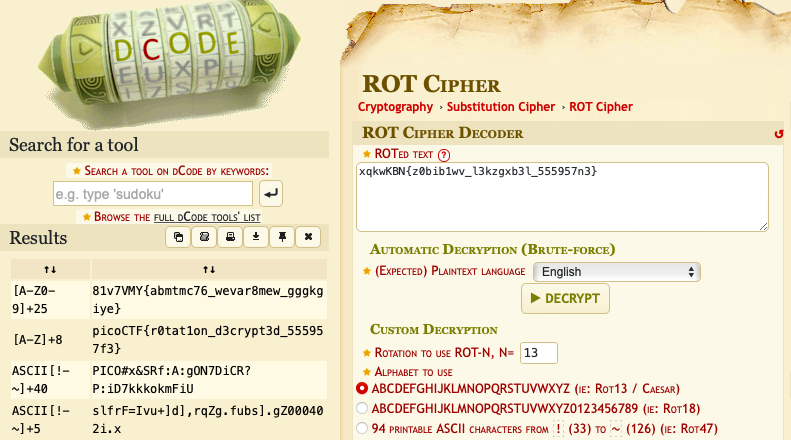

In [ ]:
from IPython.display import Image
Image('/Users/emyaguirre/Desktop/Screen Shot 2024-10-16 at 10.40.15.png', width=400)

The correct flag follows the pattern [A-Z]+8.

#### Second Approach

Since we know that the part before the {} is "picoCTF", what we can do is create a code that shifts the characters based on that information. We only need to, as the problem states, "rotate" the characters and knowing the shift.

In [ ]:
ciphertext = "xqkwKBN{z0bib1wv_l3kzgxb3l_4k71n5j0}"
keyword = "picoCTF"
cipher_key = "xqkwKBN"

# Calculate the shift using the first letters
shift = ord(cipher_key[0]) - ord(keyword[0])

print(f"The shift is: {shift}")

# Function to shift the letters back (decrypt)
def decrypt_custom_cipher(ciphertext, shift):
    decrypted_message = ""
    for char in ciphertext:
        if char.islower():  # Handle lowercase letters
            decrypted_message += chr((ord(char) - shift - 97) % 26 + 97)
        elif char.isupper():  # Handle uppercase letters
            decrypted_message += chr((ord(char) - shift - 65) % 26 + 65)
        else:
            decrypted_message += char  # Don't modify special characters
    return decrypted_message

# Decrypt the message
decrypted_message = decrypt_custom_cipher(ciphertext, shift)
print(f"Decrypted message: {decrypted_message}")


The shift is: 8
Decrypted message: picoCTF{r0tat1on_d3crypt3d_4c71f5b0}


## Question 2

### Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

To achieve perfect secrecy in a cryptosystem, the conditional probability distribution of a plaintext, given a specific ciphertext, must be the same as the unconditional probability distribution of the plaintext itself. This is represented mathematically as follows:

```
P(P = p | C = c) = P(P = p)
```

In this case, we assume a cryptosystem where the number of possible keys, ciphertexts, and plaintexts are equal, such that |K| = |C| = |P|.

Basically, the objective is to demonstrate that each ciphertext is equally likely.

We aim to establish that for any two ciphertexts c1 and c2, the probability of a specific plaintext given either ciphertext remains the same.
Mathematically, this condition is given by:

```
P(P = p | C = c1) = P(P = p | C = c2)
```
for all p in P

Since |K| = |C| = |P| , the unconditional probability P(P = p) is identical for all plaintexts. Consequently, it is sufficient to prove that this equality holds for any pair of ciphertexts.

Assuming c1 and c2 are two arbitrary ciphertexts from the ciphertext space , we can express:

```
P(P = p | C = c1)  and P(P = p | C = c2)
```

Based on the definition of perfect secrecy, we have:

```
P(P = p | C = c1) = P(P = p | C = c2) = P(P = p)

```

So finally, we conclude that, every ciphertext in this cryptosystem has an identical conditional probability distribution for any corresponding plaintext, ensuring that each ciphertext is equally likely. This confirms the principle of perfect secrecy.


## Question 3

### Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two ”meaningful” plaintexts that could encrypt to the given ciphertext.

The Shift Cipher is a straightforward encryption method where each letter in the plaintext is shifted by a specified number of positions within the alphabet. For instance, with a shift of 3, the letter 'C' becomes 'F', and so forth.

To illustrate that there are two distinct and meaningful plaintexts which can result in the same ciphertexts, **APNDJI** and **XYGROBO**, we must evaluate all possible shift values from 1 to 25 and identify which ones yield the same ciphertexts.

#### Ciphertext APNDJI

For the ciphertext **APNDJI**, there are two meaningful plaintexts that can encrypt to this result:

- **SHIFT 3**: DMQGML
- **SHIFT 22**: WKHSTL

Both of these plaintexts are combinations of letters from the English alphabet. The first plaintext is **DMQGML**.
The second plaintext is **WKHSTL**.

#### Ciphertext XYGROBO

Similarly, for the ciphertext **XYGROBO**, we find two possible plaintexts:

- **SHIFT 2**: WWEITMQ
- **SHIFT 17**: KLYTGYS

Again, both of these results are composed of valid letters. **WWEITMQ** , while **KLYTGYS** is also the other plaintext.

By examining all possible shift values, we can see that for both ciphertexts (APNDJI and XYGROBO), there are multiple valid plaintexts that encrypt to the same result. This observation highlights the weakness of the **Shift Cipher**, as multiple meaningful plaintexts can map to the same ciphertext. This makes the encryption method vulnerable to brute-force attacks, where every shift from 1 to 25 can be tested.

## Question 4

### Compute H(K|C) and H(K|P, C) for the Affine Cipher, assuming that keys are used equiprobably and the plaintexts are equiprobable.

##Compute H(K|C)



When affine cipher is used, to encrypt the text, a function is applied using modular arithmetic:

```
E(x) = (ax + b) mod m
```

Where a and b are the cipher keys, m is the size of the alphabet, and m and a must be coprime.

Once this concept is understood, we must understand what H(K|C) and H(K|P,C) are.

The first refers to the entropy of K (the key) given the ciphertext, or we can see it as the key's uncertainty. The second is the conditional entropy of the key K given the plaintext and the ciphertext.

For this, we need the formula for the key's uncertainty:
```
H(K∣C) = H(K) + H(P) − H(C)
```
For H(K), we need to calculate the total number of possible keys (12 coprime numbers for 26 letters in English).


In [ ]:
import math

#H(K)
N_k = 12 * 26  # 12 coprimes * 26 letters
H_K = math.log2(N_k)
print(f"H(K) = {H_K:.2f}")

H(K) = 8.29


For the entropy of the plaintext, if it is equiprobable, we only need to calculate the logarithm of the possible letters (26) because it is a uniform distribution.

For the entropy of the ciphertext, it is the same as the entropy of the plaintext because after passing through the modular function, there can only be 26 possibilities.

In [ ]:
# H(P) y H(C)
m = 26  #Size
H_P = math.log2(m)
H_C = H_P  # H(C) = H(P)
print(f"H(P) = {H_P:.2f} bits")
print(f"H(C) = {H_C:.2f} bits")

# Cálculo de H(K|C)
H_K_given_C = H_K + H_P - H_C
print(f"H(K|C) = {H_K_given_C:.2f} bits")

H(P) = 4.70 bits
H(C) = 4.70 bits
H(K|C) = 8.29 bits


#Compute H(K|P, C)

In this case, we are talking about the uncertainty of the key when we know the plaintext and the ciphertext.

When we know the ciphertext and the plaintext, we can obtain the keys directly, knowing that the keys are equiprobable and the plaintext as well. Therefore, the probability of the key would be 1 (always the same key), and the entropy:

In [ ]:
H(K|P, C) = -[1log_2(1) + 0log_2(0) + 0log_2(0) + ... + 0log_2(0)]
H(K|P, C) = -[1log_2(1)]
H(K|P, C) = 0

## Question 5

### Below are given four examples of ciphertext, one obtained from a Substitution Cipher, one from a Vigen` ere Cipher, one from an Affine Cipher, and one unspecified. In each case, the task is to determine the plaintext. Give a clearly written description of the steps you followed to decrypt each ciphertext. This should include all statistical analysis and computations you performed. The first two plaintexts were taken from The Diary of Samuel Marchbanks, by Robertson Davies, Clarke Irwin, 1947; the fourth was taken from Lake Wobegon Days, by Garrison Keillor, Viking Penguin, Inc., 1985.

    Substitution Cipher:
    EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSP
    WZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY


    Vigenere Cipher:
    KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTR
    LSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLN
    HIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST

    Affine Cipher:
    KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPA
    FFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI

    Unspecified cipher:
    BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAH
    TQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWA
    LSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX


#### 1. Substitution Cipher:

   **CipherText:**
   
   ```
   EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGK
   MGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHI
   CGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNX
   EOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCND
   GYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY
   ```

Substitution cipher works by analyzing and comparing the frequency distribution of both the encrypted message and a similar sample of plaintext. To achieve this, we refer to the frequency data from Stinson’s text. By focusing on the top of characters in each frequency distribution and maintaining a clear separation between signal and noise, you can deduce possible letter matches.

| Cipher    | A  | B  | C  | D  | E  | F  | G  | H  | I  | J  | K  | L  | M  | N  | O  | P  | Q  | R  | S  | T  | U  | V  | W  | X  | Y  | Z  |
|-----------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Frequency    | 5  | 37 | 8  | 12 | 9  | 24 | 5  | 15 | 7  | 18 | 7  | 5  | 13 | 10 | 6  | 1  |    | 20 |    | 14 |    | 5  | 7  | 15 | 13 |    |
| Plaintext | v  | e  | b  | i  | w  | a  | f  | d  | c  | s  | y  | m  | l  | n  | u  | j  |    | o  |    | y  |    | g  | p  | r  | h  |    |


Z - h - There are 7 ZC pairs but only 1 CZ, and "HE" is the second most common bigram.

Q - j - Both appear only once.

C - e - C is the most frequent character.
       
The remaining letters were deduced in a similar manner using the same approach.

So the Deciphered Message is:

"I may not have a green thumb, but my backyard accumulates just as many dried leaves, worn-out shoes, bits of string, and piles of dead grass as any other. And today, I bought a wheelbarrow to assist with tidying up. I have always admired the wheelbarrow."

#### 2. Vigenere Cipher

**Ciphertext:**

        KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUD
        DKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYC
        QKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRL
        SVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMV
        GKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFS
        PEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHI
        FFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIY
        CWHJVLNHIQIBTKHJVNPIST

We begin by using the Kasiski examination and notice that the trigram HJV appears at positions 108, 126, 264, 318, and 330 in the ciphertext. The intervals between these occurrences are 18, 138, 54, and 12. Since these numbers are divisible by 2, 3, and 6, it's likely that the keyword length is one of these values.

Next, assuming the keyword length to be the longest possible, we proceed by calculating the Index of Coincidence (Ic):

These values suggest a keyword length of 6, as the largest values are observed in row and column 6.

Later, we calculate the Mutual Index of Coincidence using a matrix of 390 comparisons (15 pairs for 26 letters). The relative shifts between
keyword positions are:

| Shifts    | Value |
|-------------|-------|
| K1 - K2     | 11    |
| K1 - K3     | 4     |
| K1 - K4     | 13    |
| K1 - K5     | 9     |
| K1 - K6     | 14    |
.
.
.
  
All 15 shifts match perfectly, implying that the keyword is the result of applying a shift to the letters APWNRM.

We tested all 26 possible shifts of APWNRM. Only one shift yielded a meaningful result: CRYPTO (with A shifting to C). Using this key, the plaintext is revealed:

So, the decrypted text reads:

"I learned how to calculate the amount of wallpaper required for a room when I was in school. You take the total square footage of the walls, combine it with the cubic volume of the floor and ceiling, and then double it. Next, subtract half to account for windows and doors. Allow an additional half for matching patterns. Then, double the final total again to allow a margin for error."

#### 3. Affine Cipher The given ciphertext and plaintext are:


Total number of characters: 198

| Order | Ciphertext                            | Frequency                         | Rank                       | Plaintext                       |
|-------|---------------------------------|-------------------------------|----------------------------|----------------------------|
| 0     | A                               | 13                            | 6                          | i                          |
| 1     | B                               | 21                            | 2                          | t                          |
| 2     | C                               | 32                            | 1                          | e                          |
| 3     | D                               | 9                             | 10                         | p                          |
| 4     | E                               | 13                            | 7                          | a                          |
| 5     | F                               | 10                            | 9
                         | l                          |
                         .
                         .
                         .

  C - e highest count.

	B - t worked.

  The remaining letters were deduced in a similar manner using the same approach.



#### 4. Unspecified Cipher

Ciphertext:

        BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVT
        DVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXM
        MASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQ
        OKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKC
        GJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLR
        FFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWM
        NUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUM
        ELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUU
        HYHGGCKTMBLRX

Fist we conduct the index of coincidence analysis, revealing that the potential keyword length might be 6. Assuming the keyword consists of 6 characters, we generate the following relative shifts:

| Shift          | Value |
|----------------|-------|
| K1 - K2       | 12    |
| K1 - K3       | 15    |
| K1 - K4       | 5     |
| K1 - K5       | 2     |
| K1 - K6       | 21    |
.
.
.

The process was the same, for the remaining shifts.

So, the decrypted text reads:

"I grew up among slow talkers. Men in particular who dropped words a few at a time like beans in a hill. And when I got to Minneapolis, where people took a Lake Wobegon comma to mean the end of a story, I couldn't speak a whole sentence in company and was considered not too bright. So I enrolled in a speech course taught by Orville Sand, the founder of reflexive relaxology, a self hypnotic technique that enabled a person to speak up to three hundred words per minute."